<a href="https://colab.research.google.com/github/PRIYANKA-1907/datascience/blob/main/WEEK_5_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("ecommerce_dataset.csv")
df.head()
df.fillna({
    "Annual_Income": df["Annual_Income"].median(),
    "Spending_Score": df["Spending_Score"].mean(),
    "Purchase_Frequency": df["Purchase_Frequency"].median(),
    "Last_Transaction_Days": df["Last_Transaction_Days"].median(),
    "Gender": df["Gender"].mode()[0],
    "Preferred_Category": df["Preferred_Category"].mode()[0]
}, inplace=True)
print(df)


Saving ecommerce_dataset.csv to ecommerce_dataset (3).csv
     Customer_ID   Age  Gender  Annual_Income  Spending_Score  \
0              1  56.0    Male        71663.0            96.0   
1              2  69.0    Male        35708.0            27.0   
2              3  46.0    Male       111906.0            63.0   
3              4  32.0    Male        69811.0            96.0   
4              5  60.0    Male        22811.0            68.0   
..           ...   ...     ...            ...             ...   
100           84  32.0  Female        90091.0            62.0   
101           54  43.0    Male        52711.0             8.0   
102           71   NaN    Male       110272.0            19.0   
103           46  26.0  Female        71407.0            85.0   
104           45  38.0  Female        35151.0            46.0   

     Purchase_Frequency  Last_Transaction_Days Preferred_Category  
0                    11                     75            Grocery  
1                     5  

2

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

scaler = MinMaxScaler()
df[['Annual_Income', 'Spending_Score']] = scaler.fit_transform(df[['Annual_Income', 'Spending_Score']])

standard_scaler = StandardScaler()
df[['Purchase_Frequency']] = standard_scaler.fit_transform(df[['Purchase_Frequency']])

label_encoder = LabelEncoder()
df['Preferred_Category'] = label_encoder.fit_transform(df['Preferred_Category'])
print(df)


     Customer_ID   Age  Annual_Income  Spending_Score  Purchase_Frequency  \
0              1  56.0       0.510244        0.978947            0.251094   
1              2  69.0       0.142305        0.252632           -0.782824   
2              3  46.0       0.922063        0.631579           -1.472103   
3              4  32.0       0.491291        0.978947           -0.265865   
4              5  60.0       0.010325        0.684211            0.423414   
..           ...   ...            ...             ...                 ...   
100           84  32.0       0.698823        0.621053            0.595734   
101           54  43.0       0.316302        0.052632            0.078775   
102           71   NaN       0.905342        0.168421           -1.472103   
103           46  26.0       0.507624        0.863158           -0.782824   
104           45  38.0       0.136605        0.452632            0.768054   

     Last_Transaction_Days  Preferred_Category  Gender_Female  Gender_Male 

3

In [ ]:
import pandas as pd
import numpy as np


df['Customer_Loyalty_Score'] = pd.cut(df['Spending_Score'] * df['Purchase_Frequency'],
                                      bins=[-1, 1000, 5000, np.inf],
                                      labels=['Low', 'Medium', 'High'])

df['Income_Level'] = pd.cut(df['Annual_Income'],
                            bins=[-1, 40000, 80000, np.inf],
                            labels=['Low', 'Medium', 'High'])

df['Engagement_Status'] = pd.cut(df['Last_Transaction_Days'] / df['Purchase_Frequency'],
                                 bins=[-1, 30, 180, np.inf],
                                 labels=['Active', 'Dormant', 'Churned'])
print(df)


     Customer_ID   Age  Annual_Income  Spending_Score  Purchase_Frequency  \
0              1  56.0       0.510244        0.978947            0.251094   
1              2  69.0       0.142305        0.252632           -0.782824   
2              3  46.0       0.922063        0.631579           -1.472103   
3              4  32.0       0.491291        0.978947           -0.265865   
4              5  60.0       0.010325        0.684211            0.423414   
..           ...   ...            ...             ...                 ...   
100           84  32.0       0.698823        0.621053            0.595734   
101           54  43.0       0.316302        0.052632            0.078775   
102           71   NaN       0.905342        0.168421           -1.472103   
103           46  26.0       0.507624        0.863158           -0.782824   
104           45  38.0       0.136605        0.452632            0.768054   

     Last_Transaction_Days  Preferred_Category  Gender_Female  Gender_Male 

4.1

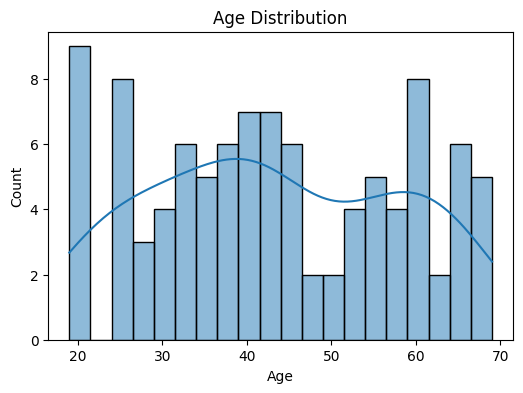

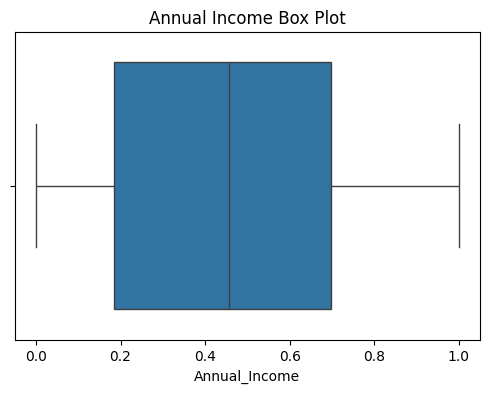

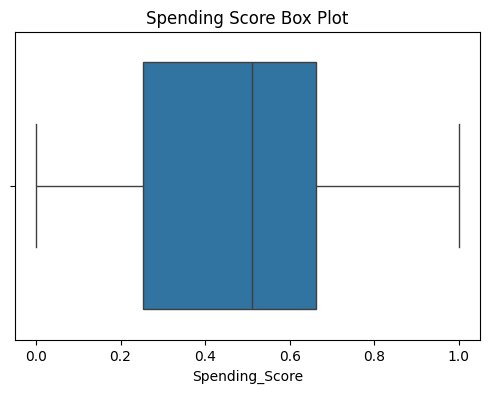

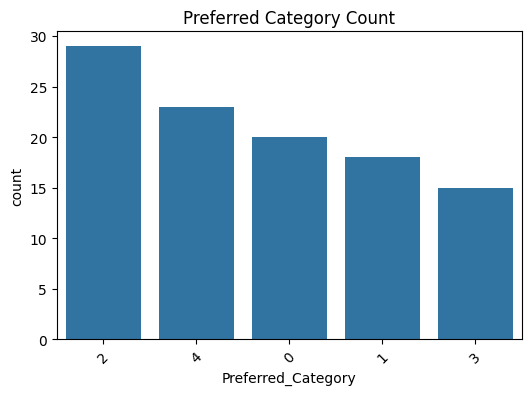

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Annual_Income'])
plt.title("Annual Income Box Plot")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Spending_Score'])
plt.title("Spending Score Box Plot")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=df['Preferred_Category'], order=df['Preferred_Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Preferred Category Count")
plt.show()


4.2

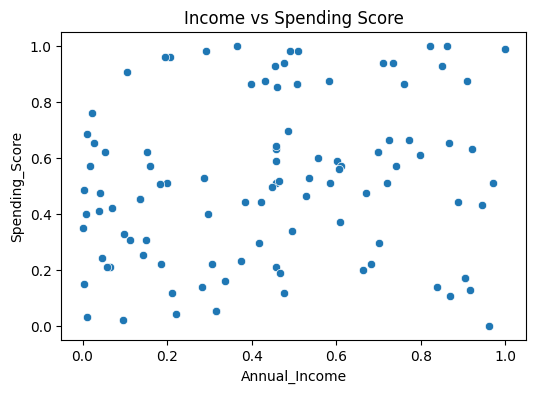

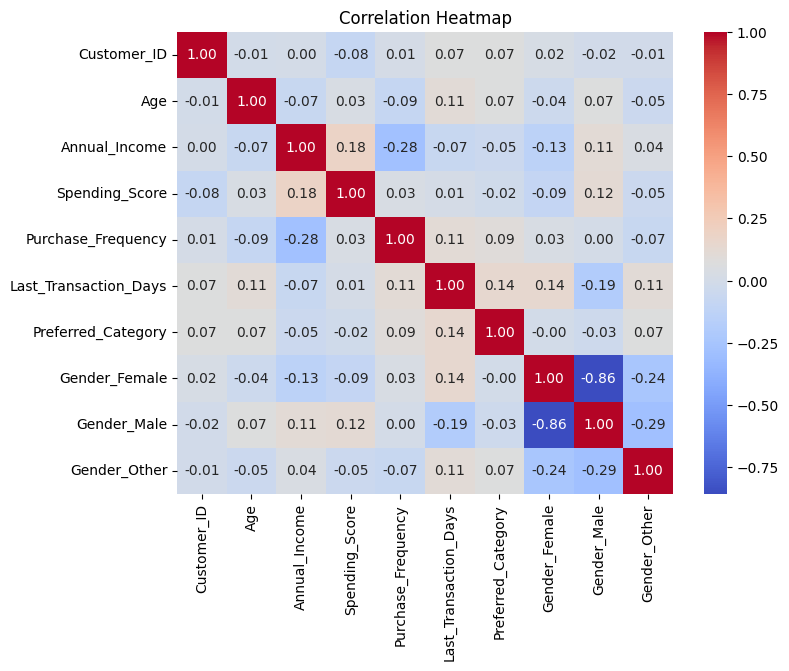

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Annual_Income'], y=df['Spending_Score'])
plt.title("Income vs Spending Score")
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


4.3

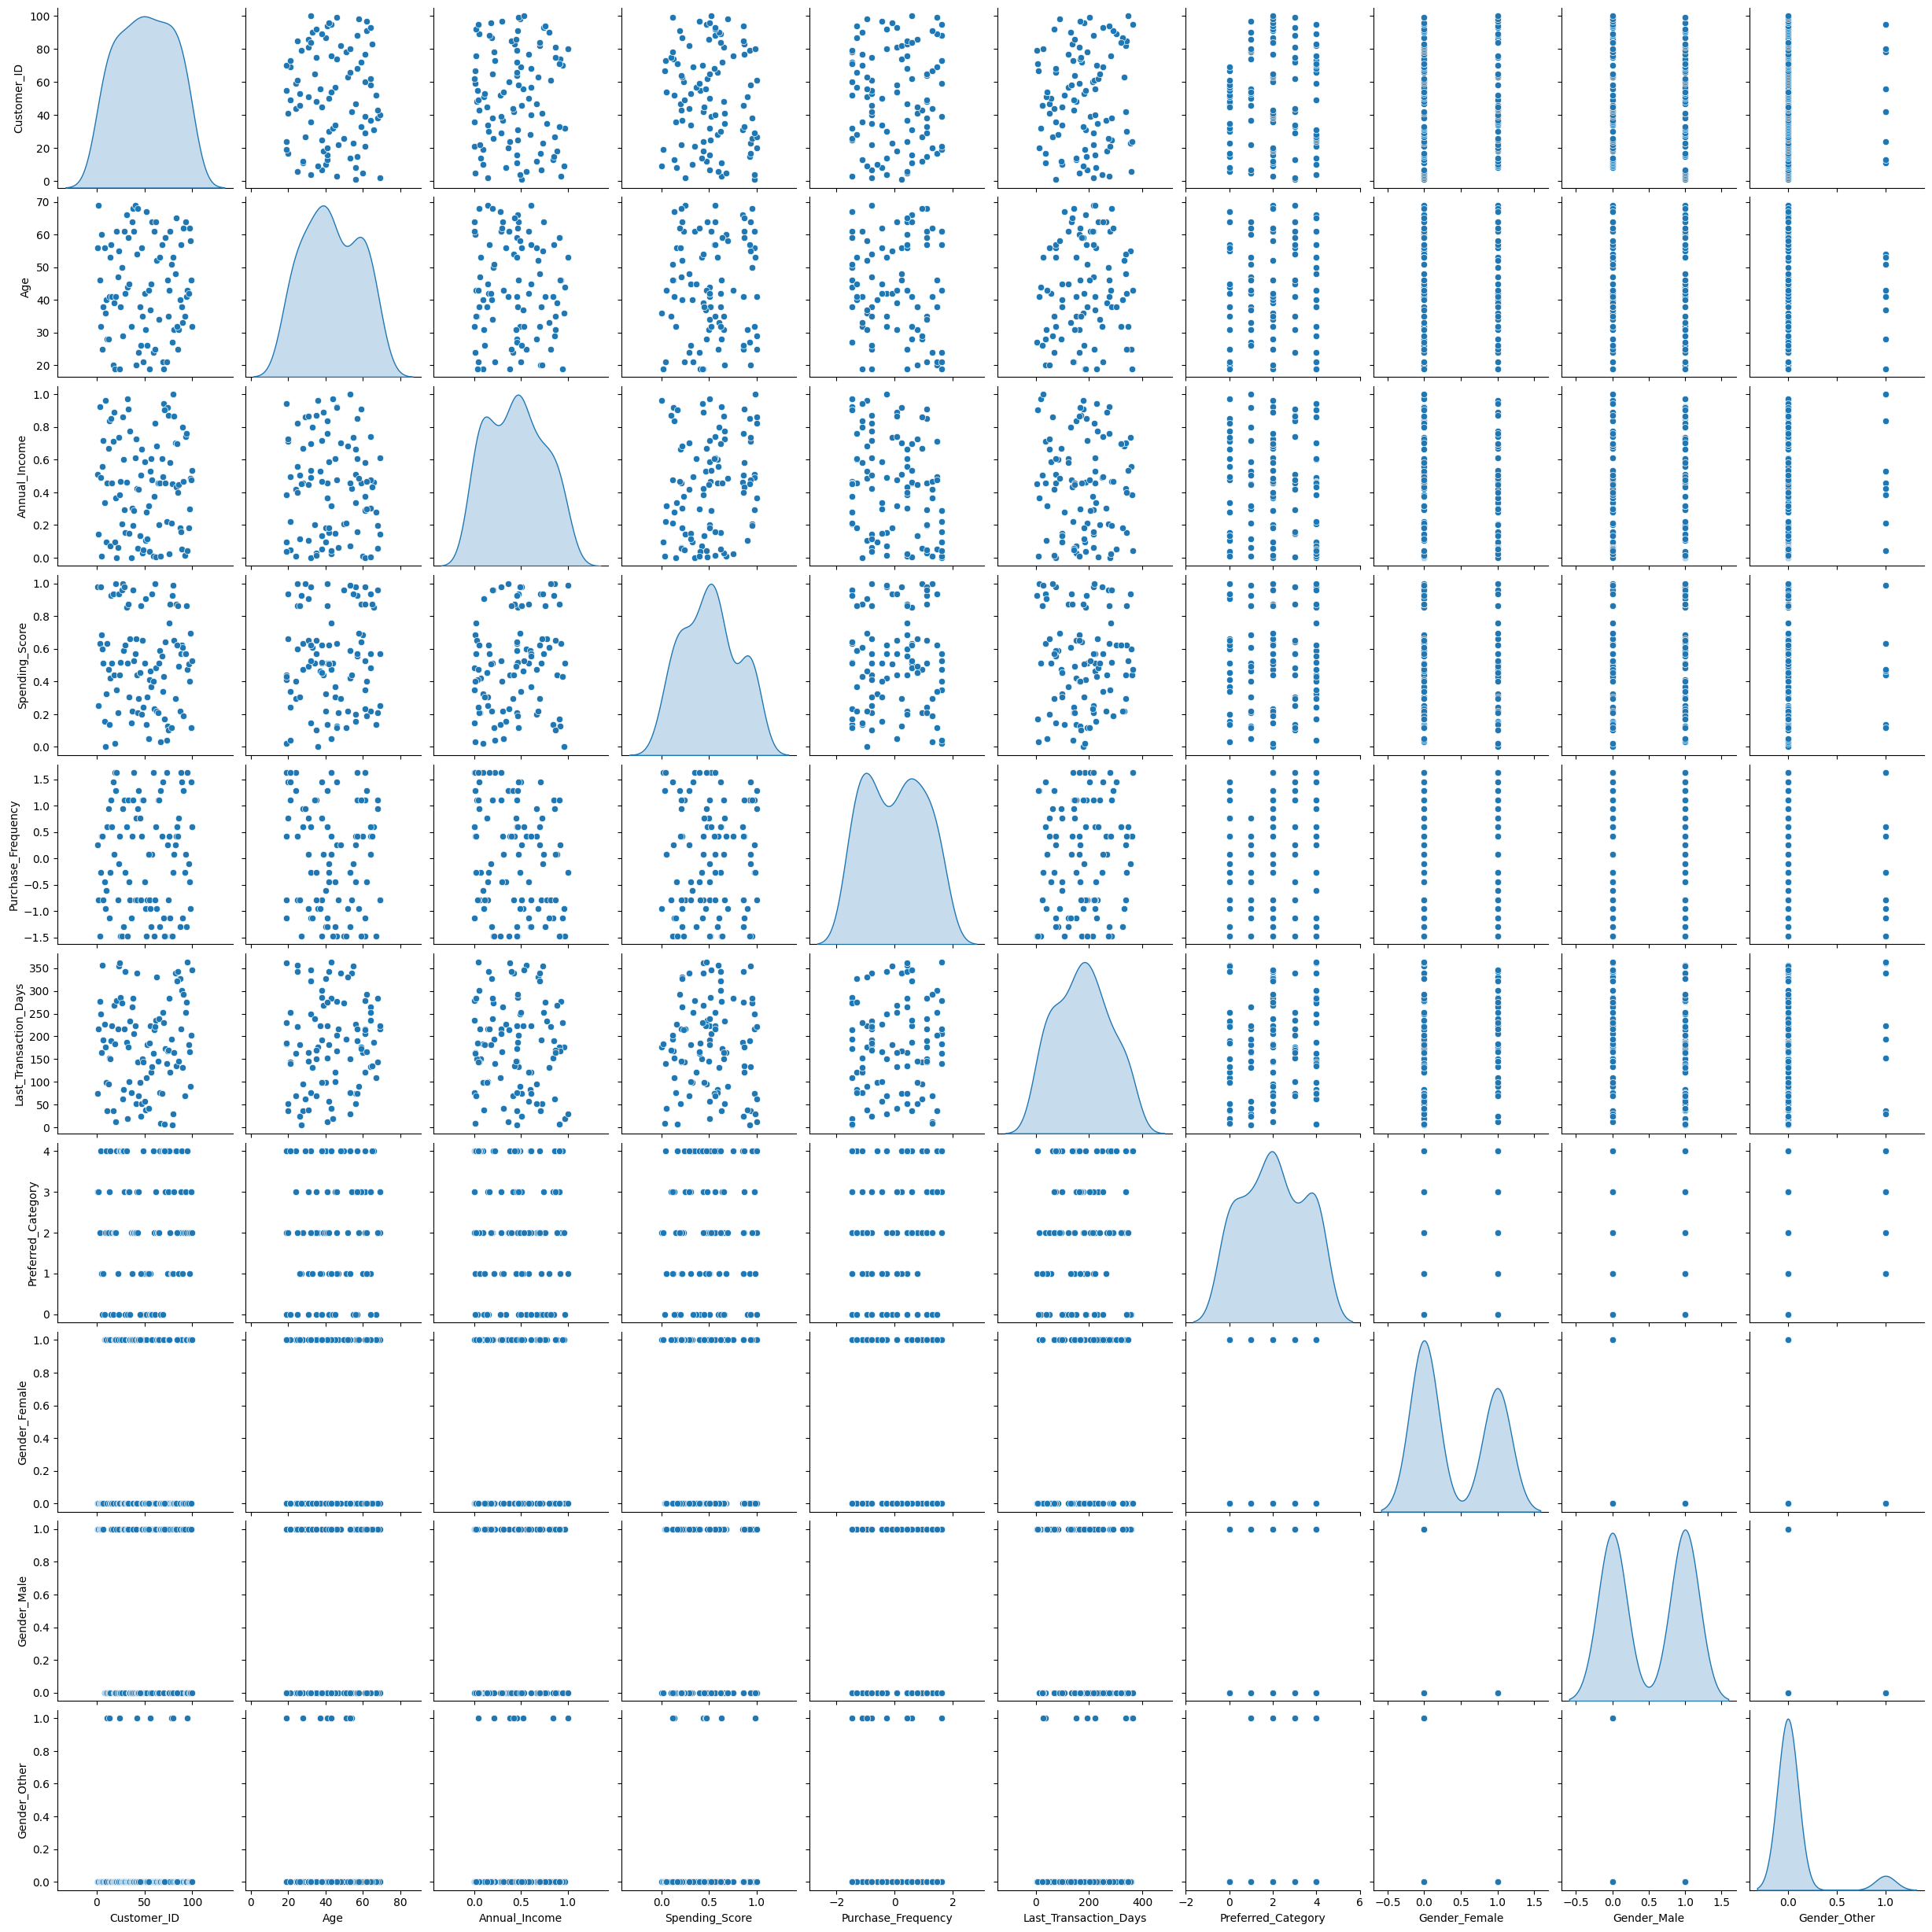

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, diag_kind='kde')
plt.show()


4.4

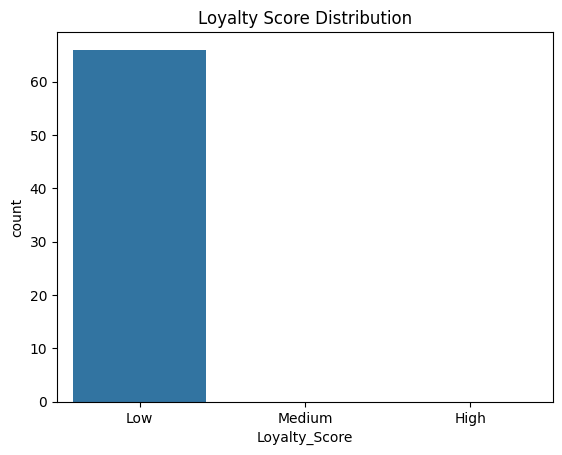

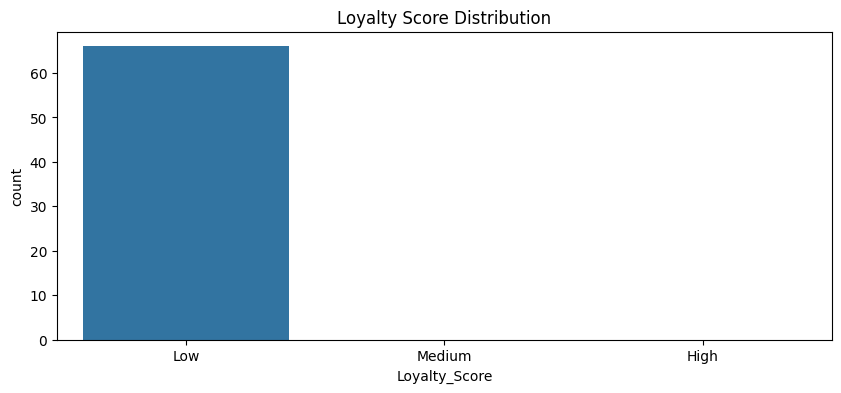

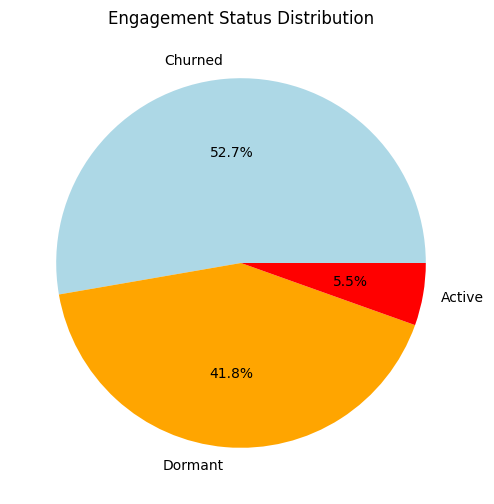

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df['Loyalty_Score'] = pd.cut(df['Spending_Score'] + df['Purchase_Frequency'],
                             bins=[0, 50, 100, float('inf')],
                             labels=['Low', 'Medium', 'High'])

sns.countplot(x='Loyalty_Score', data=df)
plt.title('Loyalty Score Distribution')
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(x='Loyalty_Score', data=df)
plt.title('Loyalty Score Distribution')
plt.show()

plt.figure(figsize=(6, 6))
df['Engagement_Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'orange', 'red'])
plt.title('Engagement Status Distribution')
plt.ylabel('')
plt.show()


4.5

In [ ]:
import plotly.express as px

fig = px.scatter(
    df,
    x='Annual_Income',
    y='Spending_Score',
    color='Loyalty_Score',
    hover_data=['Customer_ID', 'Purchase_Frequency'],
    title='Annual Income vs Spending Score'
)
fig.show()



5.1

In [ ]:
# Identify and count missing values
print("Missing Values Count:\n", df.isnull().sum())



Missing Values Count:
 Customer_ID                0
Age                        6
Annual_Income              0
Spending_Score             0
Purchase_Frequency         0
Last_Transaction_Days      0
Preferred_Category         0
Gender_Female              0
Gender_Male                0
Gender_Other               0
Customer_Loyalty_Score     3
Income_Level               0
Engagement_Status         50
Loyalty_Score             39
dtype: int64


5.2

In [ ]:
# Option 1: Remove rows with missing values
from google.colab import files
import pandas as pd
uploaded = files.upload()
df = pd.read_csv("ecommerce_dataset.csv")
df.head()
df_dropped = df.dropna()
print("\nData after dropping missing values:\n", df_dropped)



Saving ecommerce_dataset.csv to ecommerce_dataset (2).csv

Data after dropping missing values:
      Customer_ID   Age  Gender  Annual_Income  Spending_Score  \
0              1  56.0    Male        71663.0            96.0   
1              2  69.0    Male        35708.0            27.0   
3              4  32.0    Male        69811.0            96.0   
4              5  60.0    Male        22811.0            68.0   
5              6  25.0    Male        76250.0            60.0   
..           ...   ...     ...            ...             ...   
99           100  32.0  Female        74045.0            53.0   
100           84  32.0  Female        90091.0            62.0   
101           54  43.0    Male        52711.0             8.0   
103           46  26.0  Female        71407.0            85.0   
104           45  38.0  Female        35151.0            46.0   

     Purchase_Frequency  Last_Transaction_Days Preferred_Category  
0                    11                     75         

5.3

In [ ]:
# Option 2: Fill missing values
df_filled = df.copy()
df_filled['Age'].fillna(df_filled['Age'].mean(), inplace=True)  # Fill numerical with mean
df_filled['Annual_Income'].fillna(df_filled['Annual_Income'].mode()[0], inplace=True)  # Fill categorical with mode

print("\nData after filling missing values:\n", df_filled)



Data after filling missing values:
      Customer_ID        Age  Annual_Income  Spending_Score  \
0              1  56.000000       0.510244        0.978947   
1              2  69.000000       0.142305        0.252632   
2              3  46.000000       0.922063        0.631579   
3              4  32.000000       0.491291        0.978947   
4              5  60.000000       0.010325        0.684211   
..           ...        ...            ...             ...   
100           84  32.000000       0.698823        0.621053   
101           54  43.000000       0.316302        0.052632   
102           71  43.242424       0.905342        0.168421   
103           46  26.000000       0.507624        0.863158   
104           45  38.000000       0.136605        0.452632   

     Purchase_Frequency  Last_Transaction_Days  Preferred_Category  \
0              0.251094                     75                   3   
1             -0.782824                    217                   3   
2       

<ipython-input-49-3170073cd87a>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-49-3170073cd87a>:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

5.4

In [ ]:
df_no_duplicates = df_filled.drop_duplicates()
print("\nData after dropping duplicates:\n", df_no_duplicates)



Data after dropping duplicates:
     Customer_ID   Age  Annual_Income  Spending_Score  Purchase_Frequency  \
0             1  56.0       0.510244        0.978947            0.251094   
1             2  69.0       0.142305        0.252632           -0.782824   
2             3  46.0       0.922063        0.631579           -1.472103   
3             4  32.0       0.491291        0.978947           -0.265865   
4             5  60.0       0.010325        0.684211            0.423414   
..          ...   ...            ...             ...                 ...   
95           96  42.0       0.183545        0.505263           -0.093545   
96           97  62.0       0.296193        0.400000           -0.438184   
97           98  58.0       0.486850        0.694737           -0.955144   
98           99  46.0       0.476893        0.115789            1.457333   
99          100  32.0       0.534619        0.526316            0.595734   

    Last_Transaction_Days  Preferred_Category  Gender

5.5

In [ ]:
# Normalize Annual_Income & Spending_Score using Min-Max Scaling
scaler = MinMaxScaler()
df[['Annual_Income', 'Spending_Score']] = scaler.fit_transform(df[['Annual_Income', 'Spending_Score']])


5.6

In [ ]:
scaler = StandardScaler()
df[['Purchase_Frequency']] = scaler.fit_transform(df[['Purchase_Frequency']])


5.7

In [ ]:
df = pd.get_dummies(df, columns=['Age'], drop_first=True)  # 'drop_first=True' avoids dummy variable trap



5.8

In [ ]:
label_encoder = LabelEncoder()
df['Preferred_Category'] = label_encoder.fit_transform(df['Preferred_Category'])


5.9

In [ ]:
print(df)

     Customer_ID  Annual_Income  Spending_Score  Purchase_Frequency  \
0              1       0.510244        0.978947            0.251094   
1              2       0.142305        0.252632           -0.782824   
2              3       0.922063        0.631579           -1.472103   
3              4       0.491291        0.978947           -0.265865   
4              5       0.010325        0.684211            0.423414   
..           ...            ...             ...                 ...   
100           84       0.698823        0.621053            0.595734   
101           54       0.316302        0.052632            0.078775   
102           71       0.905342        0.168421           -1.472103   
103           46       0.507624        0.863158           -0.782824   
104           45       0.136605        0.452632            0.768054   

     Last_Transaction_Days  Preferred_Category  Gender_Female  Gender_Male  \
0                       75                   3          False        